In [1]:
#multiclass situation with mutually exclusive classes --> Softmax Function
#1 Output note per class (dummy variables)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#import cleaned data set
df = pd.read_csv('cleaned_data/Cleaned Data.csv', index_col=[0])

In [4]:
df

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,Consumer Cyclical,Consumer Defensive,Energy,Financial Services,Healthcare,Industrials,Real Estate,Technology,Utilities,Signal
1,3.734148e+09,1.1737,2.805625e+09,9.285226e+08,1.083303e+08,3.441414e+08,7.939267e+08,1.345959e+08,1.214869e+07,1.753823e+08,...,0,1,0,0,0,0,0,0,0,Sell
2,1.790960e+10,0.0076,1.153980e+10,6.369800e+09,0.000000e+00,3.474300e+09,3.412400e+09,2.957400e+09,3.024000e+08,2.707700e+09,...,0,1,0,0,0,0,0,0,0,Buy
3,5.727000e+09,0.0214,3.523600e+09,2.203400e+09,0.000000e+00,1.480500e+09,1.598700e+09,6.047000e+08,6.040000e+07,4.669000e+08,...,0,1,0,0,0,0,0,0,0,Buy
4,1.972400e+10,0.0083,1.304100e+10,6.683000e+09,0.000000e+00,3.709000e+09,4.162000e+09,2.521000e+09,2.840000e+08,2.382000e+09,...,0,1,0,0,0,0,0,0,0,Buy
5,8.268000e+09,0.0268,5.297000e+09,2.971000e+09,1.220000e+08,1.505000e+09,1.704000e+09,1.267000e+09,1.220000e+08,1.240000e+09,...,0,1,0,0,0,0,0,0,0,Buy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11575,0.000000e+00,0.0000,0.000000e+00,0.000000e+00,1.572500e+07,5.269000e+06,2.099400e+07,-2.099400e+07,0.000000e+00,-2.113800e+07,...,0,0,0,0,1,0,0,0,0,Buy
11576,0.000000e+00,0.0000,0.000000e+00,0.000000e+00,0.000000e+00,3.755251e+06,3.755251e+06,-3.755251e+06,1.105849e+07,-1.482451e+07,...,0,0,0,0,0,0,1,0,0,Sell
11577,5.488438e+07,0.2210,3.659379e+07,1.829059e+07,1.652633e+06,7.020320e+06,8.672953e+06,9.617636e+06,1.239170e+06,8.416324e+06,...,0,0,0,0,0,0,0,0,0,Sell
11578,0.000000e+00,0.0000,0.000000e+00,0.000000e+00,1.031715e+07,4.521349e+06,1.664863e+07,-1.664863e+07,0.000000e+00,-1.664769e+07,...,0,0,0,0,0,1,0,0,0,Sell


In [5]:
#Arrange response variable with dummy variable
X = df.drop('Signal', axis=1)
y = pd.get_dummies(df['Signal'])

In [6]:
#inspecting if transition worked for response variable
y.head(3)

,Buy,Hold,Sell
1,0,0,1
2,1,0,0
3,1,0,0


In [7]:
from sklearn.model_selection import train_test_split

In [9]:
#Create train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [13]:
#scale our data to avoid issues (X_scaled = X_std * (max - min) + min)
from sklearn.preprocessing import MinMaxScaler

In [15]:
#creating an instance
scaler = MinMaxScaler()

#adjusting scaler only based on the training set (without test values to prevent data leakage)
scaler.fit(X_train)

MinMaxScaler()

In [33]:
#perform the transformation
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
X_train.shape

(8105, 230)

In [36]:
#import functions to create a neural network model based on keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [45]:
#set up a empty sequential model
model = Sequential()

#adding dense layers (=regular densely-connected NN layer)
#rule of thumb: Create as many NN as features for first layer
model.add(Dense(230, activation='relu'))

#dropout layer to prevent overfitting
model.add(Dropout(0.2))

#repeat process, but reduce amount of neurons for each step by half
model.add(Dense(115, activation='relu'))
model.add(Dropout(0.2))        
          
model.add(Dense(57, activation='relu'))
model.add(Dropout(0.2))           
          

#1 Output neuron per class
model.add(Dense(3, activation='softmax'))

#optimize a multi-class classification problem
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [46]:
#fit the model to our training date, 
#Our model will go trough the training data 100 times
model.fit(x=X_train, y=y_train, epochs=100, batch_size=256, 
          validation_data=(X_test,y_test))

Epoch 1/100
32/32 [==============================] - 1s 10ms/step - loss: 0.9246 - accuracy: 0.4894 - val_loss: 0.8782 - val_accuracy: 0.5314
Epoch 2/100
32/32 [==============================] - 0s 6ms/step - loss: 0.8798 - accuracy: 0.5148 - val_loss: 0.8859 - val_accuracy: 0.5314
Epoch 3/100
32/32 [==============================] - 0s 5ms/step - loss: 0.8973 - accuracy: 0.5227 - val_loss: 0.8758 - val_accuracy: 0.5314
Epoch 4/100
32/32 [==============================] - 0s 5ms/step - loss: 0.8827 - accuracy: 0.5349 - val_loss: 0.8736 - val_accuracy: 0.5314
Epoch 5/100
32/32 [==============================] - 0s 5ms/step - loss: 0.8879 - accuracy: 0.5247 - val_loss: 0.8748 - val_accuracy: 0.5314
Epoch 6/100
32/32 [==============================] - 0s 5ms/step - loss: 0.8804 - accuracy: 0.5259 - val_loss: 0.8733 - val_accuracy: 0.5325
Epoch 7/100
32/32 [==============================] - 0s 5ms/step - loss: 0.8764 - accuracy: 0.5208 - val_loss: 0.8702 - val_accuracy: 0.5314
Epoch 8/100


Epoch 59/100
32/32 [==============================] - 0s 5ms/step - loss: 0.8643 - accuracy: 0.5440 - val_loss: 0.8641 - val_accuracy: 0.5498
Epoch 60/100
32/32 [==============================] - 0s 5ms/step - loss: 0.8619 - accuracy: 0.5474 - val_loss: 0.8629 - val_accuracy: 0.5466
Epoch 61/100
32/32 [==============================] - 0s 5ms/step - loss: 0.8695 - accuracy: 0.5400 - val_loss: 0.8670 - val_accuracy: 0.5478
Epoch 62/100
32/32 [==============================] - 0s 5ms/step - loss: 0.8700 - accuracy: 0.5380 - val_loss: 0.8630 - val_accuracy: 0.5334
Epoch 63/100
32/32 [==============================] - 0s 5ms/step - loss: 0.8636 - accuracy: 0.5357 - val_loss: 0.8655 - val_accuracy: 0.5391
Epoch 64/100
32/32 [==============================] - 0s 5ms/step - loss: 0.8667 - accuracy: 0.5419 - val_loss: 0.8625 - val_accuracy: 0.5334
Epoch 65/100
32/32 [==============================] - 0s 5ms/step - loss: 0.8633 - accuracy: 0.5451 - val_loss: 0.8636 - val_accuracy: 0.5415
Epoch 

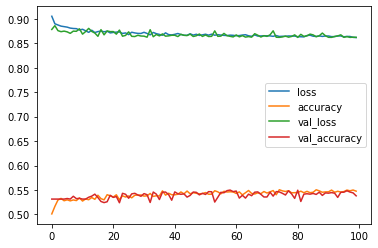

In [47]:
#plotting training history of our algorithm
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [48]:
#analysing performance on training data
model.evaluate(X_train,y_train,verbose=0)

[0.8578147292137146, 0.5548427104949951]

In [53]:
#analysing performance on test data
model.evaluate(X_test,y_test,verbose=0)

[0.8621001243591309, 0.5379965305328369]

In [56]:
df['Signal'].value_counts()

Sell    6153
Buy     4681
Hold     745
Name: Signal, dtype: int64

In [57]:
#checking if our model learned something
6153/len(df)

0.5313930391225494